In [79]:
import NO_utils_multiple
import NO_utils
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime

## Load and visualize data

data\set 1
Data loaded in 487.13 seconds.
Spatial waves shape: (600, 325, 32, 32)
n_designs: 600, n_panes: 3, design_res: 32, d_design: 2, dispersion_bands: 6, rng_seed_offset: [[0.]]
EIGENVALUE_DATA shape: (600, 325, 6)
EIGENVECTOR_DATA shape: (600, 325, 6, 2048)
EIGENVECTOR_DATA_x shape: (600, 325, 6, 32, 32)
EIGENVECTOR_DATA_y shape: (600, 325, 6, 32, 32)
WAVEVECTOR_DATA shape: (600, 325, 2)
WAVEFORM_DATA shape: (600, 325, 32, 32)
designs shape: (600, 3, 32, 32)
design_params shape: (1, 6)
const shape: {'E_max': (1, 1), 'E_min': (1, 1), 'N_eig': (1, 1), 'N_ele': (1, 1), 'N_pix': (1, 1), 'N_wv': (2, 1), 'a': (1, 1), 'design': (3, 32, 32), 'design_scale': (6, 1), 'isSaveEigenvectors': (1, 1), 'isUseGPU': (1, 1), 'isUseImprovement': (1, 1), 'isUseParallel': (1, 1), 'isUseSecondImprovement': (1, 1), 'poisson_max': (1, 1), 'poisson_min': (1, 1), 'rho_max': (1, 1), 'rho_min': (1, 1), 'sigma_eig': (1, 1), 'symmetry_type': (4, 1), 't': (1, 1), 'wavevectors': (2, 325)}


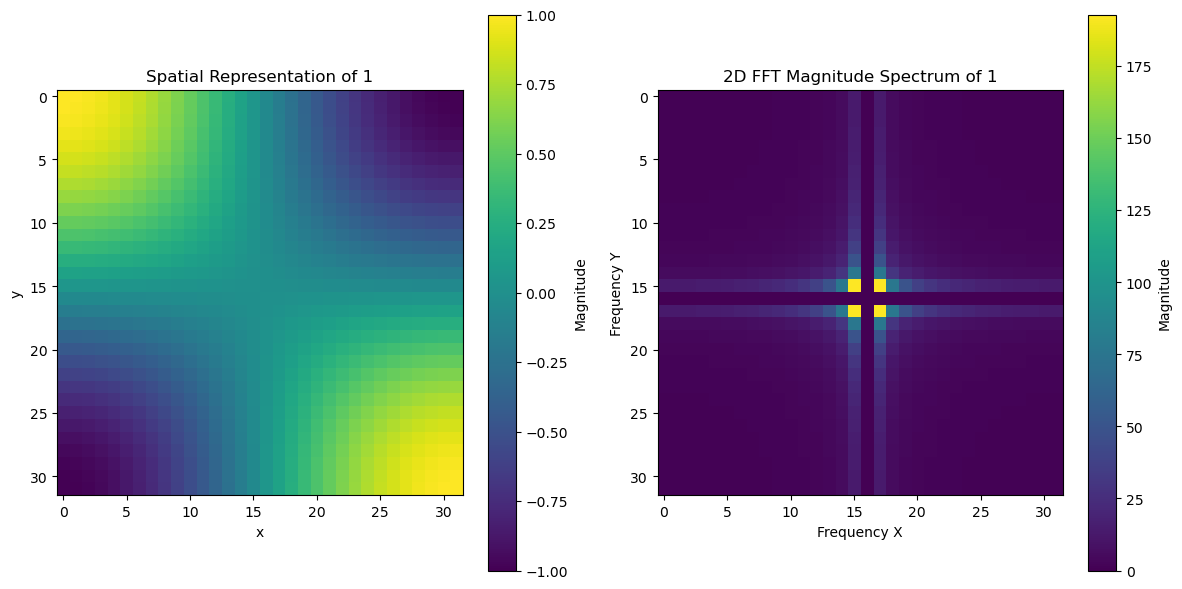

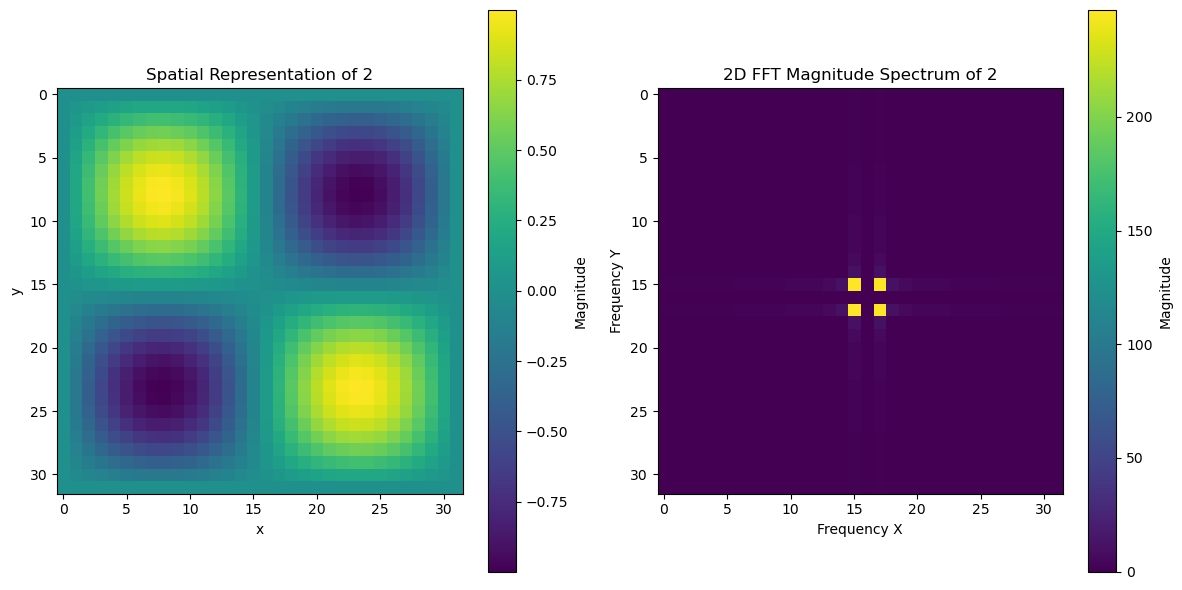

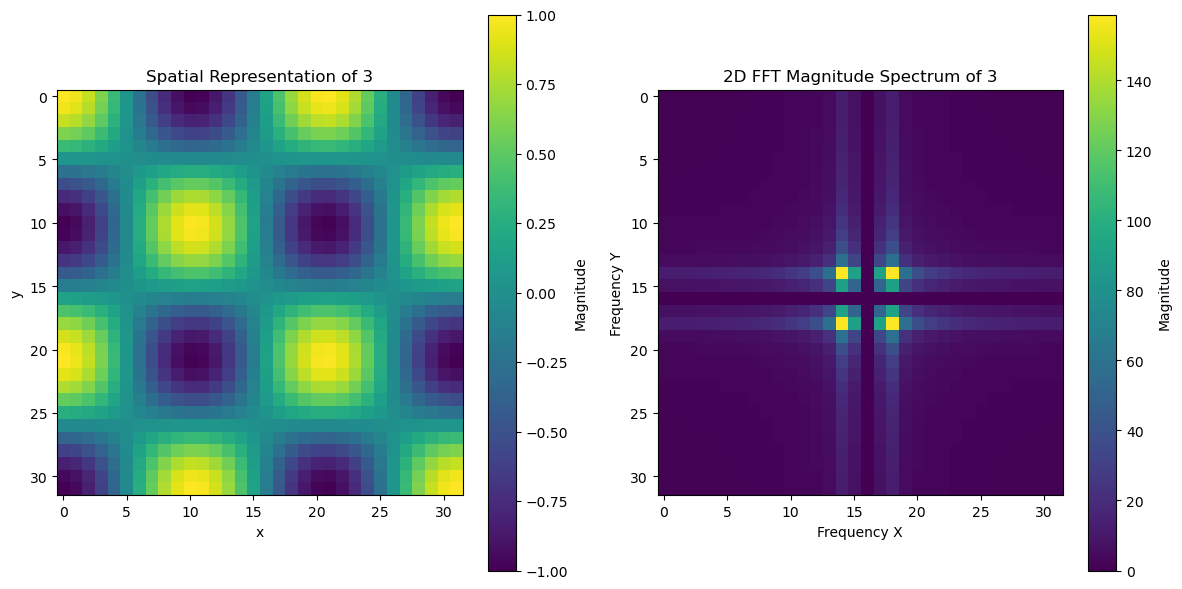

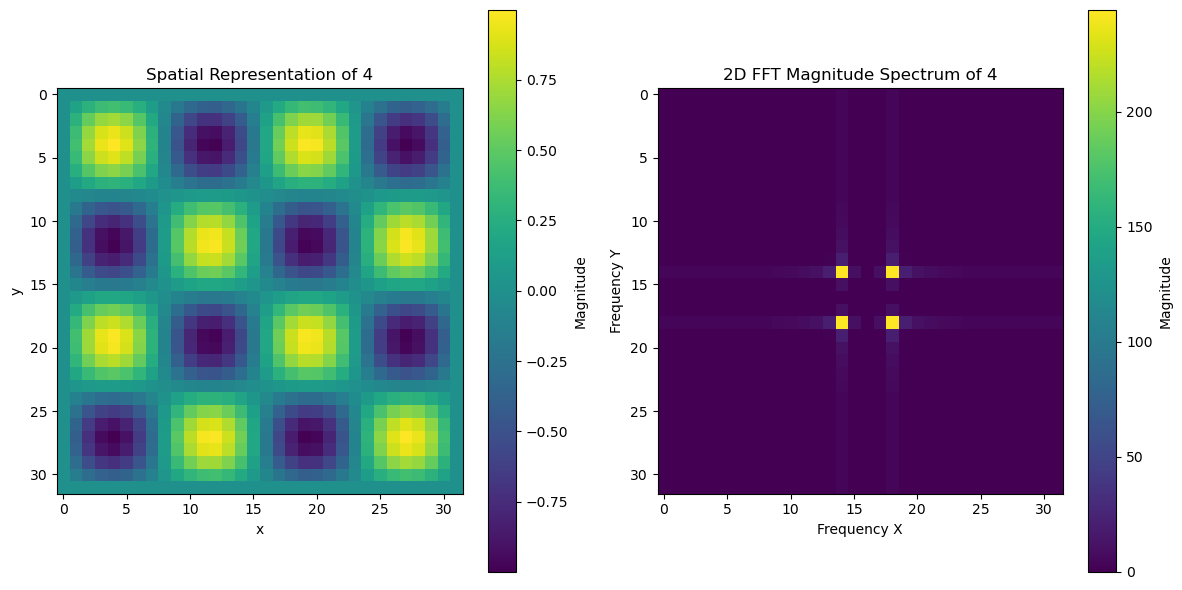

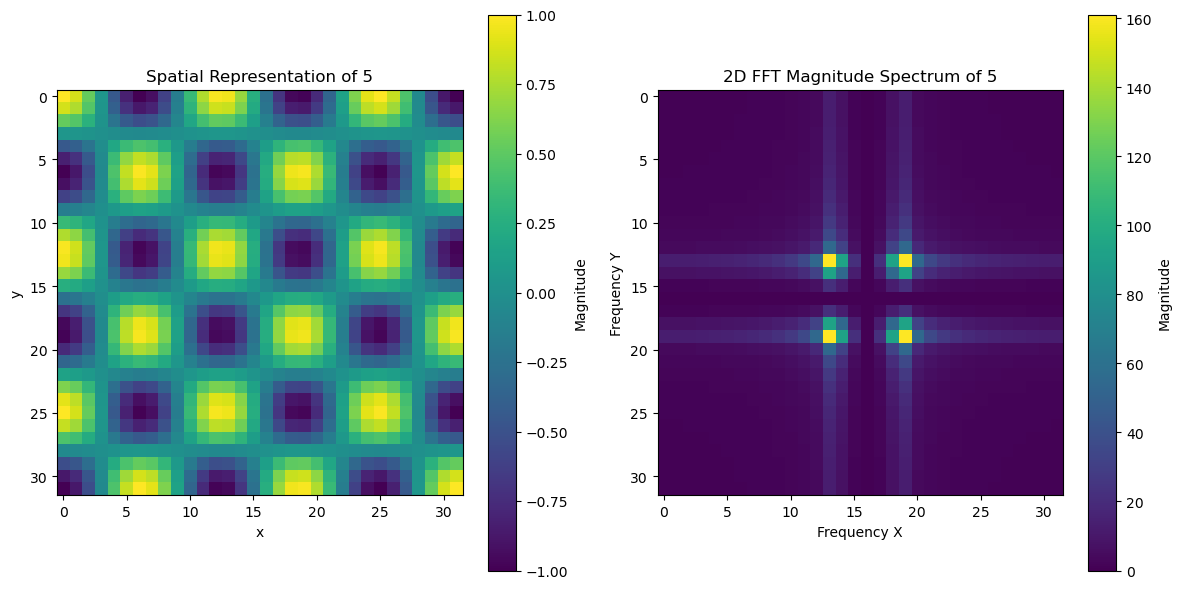

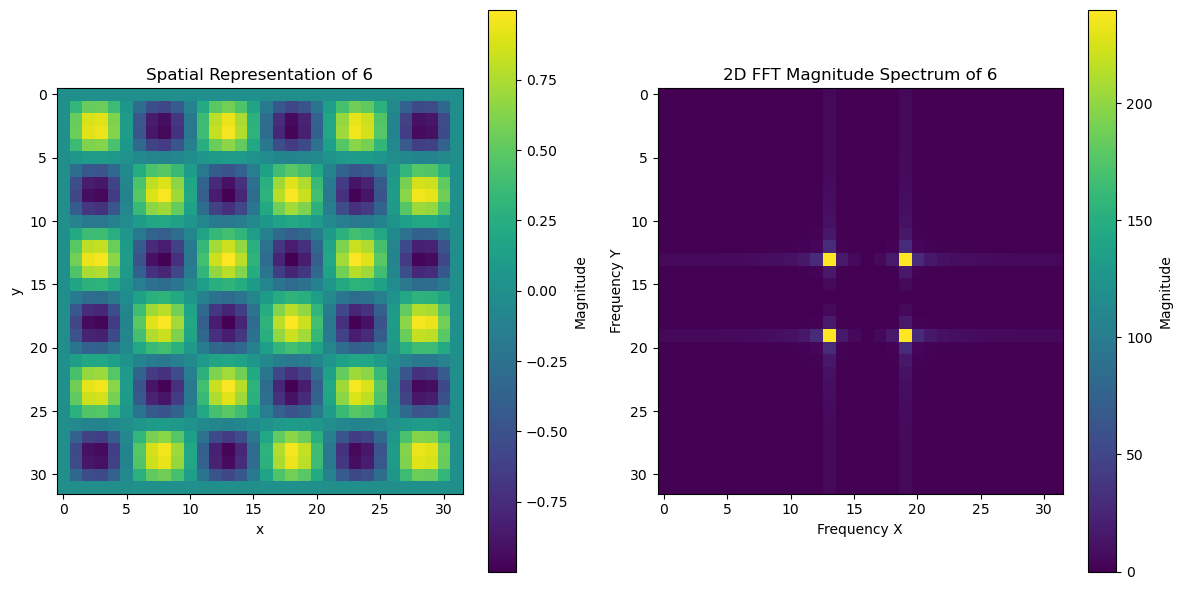

In [2]:
# Load and extract data
# datafolder_name = ["OUTPUT", "discrete_symmetric_p32_n800_rs400"]
datafolder_name = ["data", "set 1"]
data_path = os.path.join(*datafolder_name)
print(data_path)

designs, design_params, n_designs, n_panes, design_res, WAVEVECTOR_DATA, WAVEFORM_DATA, n_dim, n_wavevectors, EIGENVALUE_DATA, n_bands, EIGENVECTOR_DATA_x, EIGENVECTOR_DATA_y, const, N_struct, imag_tol, rng_seed_offset = NO_utils.extract_data(data_path)

#Convert all bands to spatial domain
bands = np.arange(1, n_bands + 1)
bands_fft = np.zeros((n_bands, design_res, design_res))
for i, band in enumerate(bands):
    bands_fft[i], _ = NO_utils_multiple.const_to_spatial(band, design_res, plot_result=True, scaling_factor=1.0)

#Take unique subset of waveforms    
waveforms = WAVEFORM_DATA[0]

In [3]:
# Print the max and min values of all the arrays with a size of 400 in its first dimension.

print(f'Max value of designs: {np.max(designs)}')
print(f'Min value of designs: {np.min(designs)}')
print(f'Max value of WAVEFORM_DATA: {np.max(WAVEFORM_DATA)}')
print(f'Min value of WAVEFORM_DATA: {np.min(WAVEFORM_DATA)}')
print(f'Max value of WAVEVECTOR_DATA_x: {np.max(EIGENVECTOR_DATA_x)}')
print(f'Min value of WAVEVECTOR_DATA_x: {np.min(EIGENVECTOR_DATA_x)}')
print(f'Max value of WAVEVECTOR_DATA_y: {np.max(EIGENVECTOR_DATA_y)}')
print(f'Min value of WAVEVECTOR_DATA_y: {np.min(EIGENVECTOR_DATA_y)}')

# Flatten the arrays and plot a separate histogram showing the distribution of values for each array with a size of 400 in its first dimension. Drop any imaginary components for the eigenvectors.

# Flatten the arrays
designs_flat = designs.flatten()
WAVEFORM_DATA_flat = WAVEFORM_DATA.flatten()
EIGENVECTOR_DATA_x_flat = EIGENVECTOR_DATA_x.flatten()
EIGENVECTOR_DATA_y_flat = EIGENVECTOR_DATA_y.flatten()

# Take the symlog of the flattened arrays. Take the real value for complex valued arrays.
# designs_flat_symlog = np.sign(designs_flat) * np.log10(np.abs(designs_flat) + 1)
# WAVEFORM_DATA_flat_symlog = np.sign(WAVEFORM_DATA_flat) * np.log10(np.abs(WAVEFORM_DATA_flat) + 1)
# EIGENVECTOR_DATA_x_flat_symlog = np.sign(EIGENVECTOR_DATA_x_flat.real) * np.log10(np.abs(EIGENVECTOR_DATA_x_flat.real) + 1)
# EIGENVECTOR_DATA_y_flat_symlog = np.sign(EIGENVECTOR_DATA_y_flat.real) * np.log10(np.abs(EIGENVECTOR_DATA_y_flat.real) + 1)

Max value of designs: 1.0
Min value of designs: 0.0
Max value of WAVEFORM_DATA: 1.0
Min value of WAVEFORM_DATA: -0.9999995318233016
Max value of WAVEVECTOR_DATA_x: (0.59423828125+0j)
Min value of WAVEVECTOR_DATA_x: (-0.685546875+0j)
Max value of WAVEVECTOR_DATA_y: (0.63818359375+0.1103515625j)
Min value of WAVEVECTOR_DATA_y: (-0.59228515625-0.0186614990234375j)


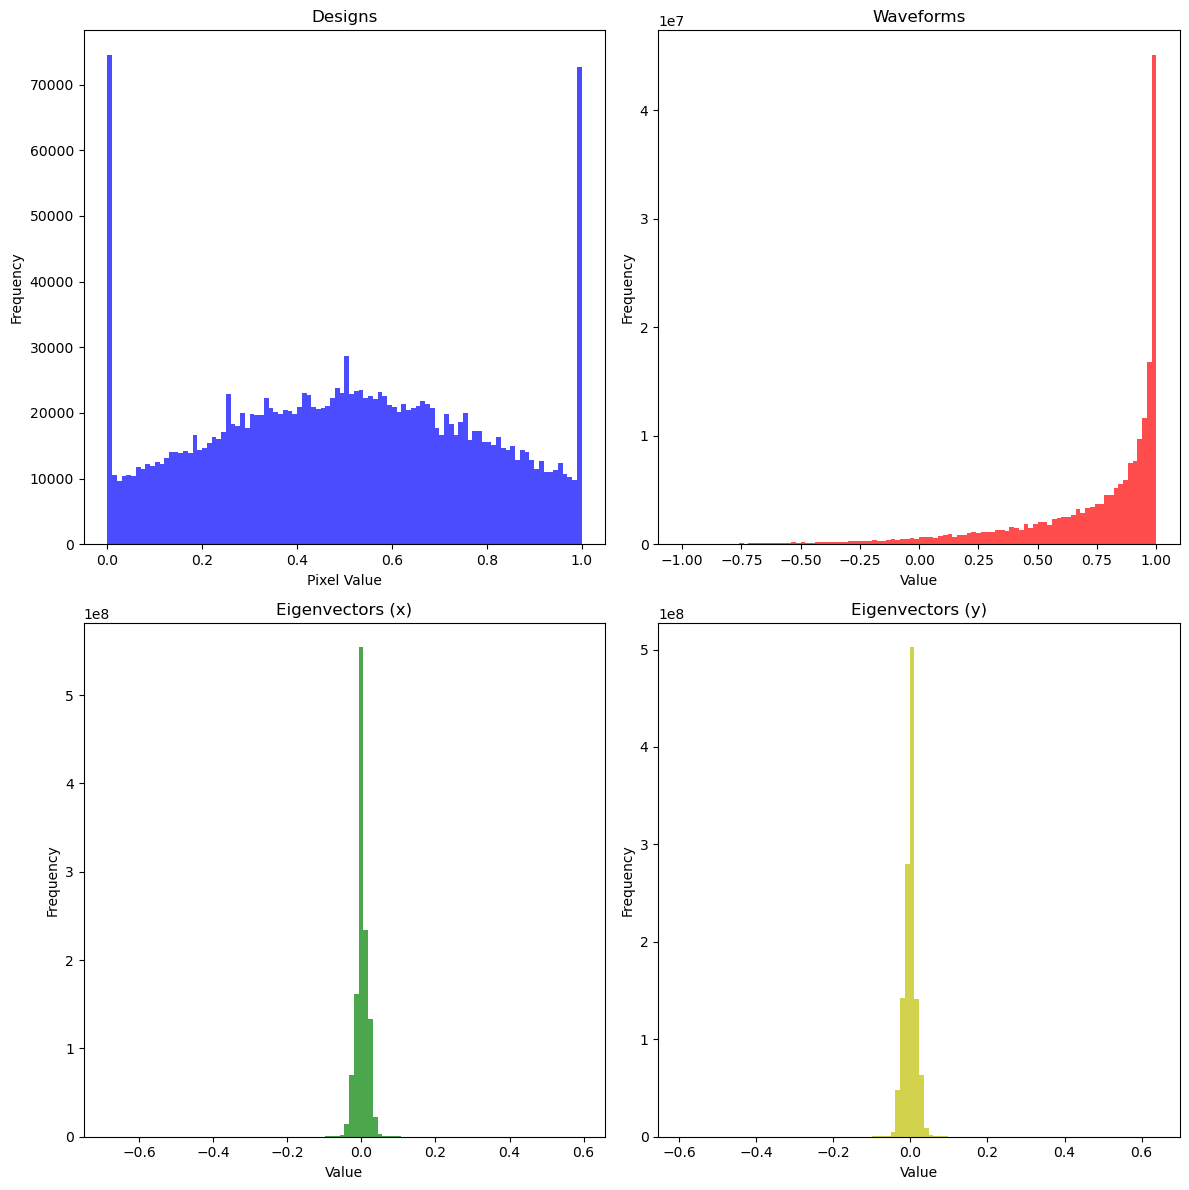

In [4]:
# Plot the histograms of flattened real values for each array
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].hist(designs_flat, bins=100, color='b', alpha=0.7)
axes[0, 0].set_title('Designs')
axes[0, 0].set_xlabel('Pixel Value')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(WAVEFORM_DATA_flat, bins=100, color='r', alpha=0.7)
axes[0, 1].set_title('Waveforms')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(EIGENVECTOR_DATA_x_flat.real, bins=100, color='g', alpha=0.7)
axes[1, 0].set_title('Eigenvectors (x)')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(EIGENVECTOR_DATA_y_flat.real, bins=100, color='y', alpha=0.7)
axes[1, 1].set_title('Eigenvectors (y)')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
# Plot the histograms of flattened log abs values for each array
# fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# 
# axes[0, 0].hist(designs_flat_symlog, bins=100, color='b', alpha=0.7)
# axes[0, 0].set_title('Designs')
# axes[0, 0].set_xlabel('Log Abs Value')
# axes[0, 0].set_ylabel('Frequency')
# 
# axes[0, 1].hist(WAVEFORM_DATA_flat_symlog, bins=100, color='r', alpha=0.7)
# axes[0, 1].set_title('Waveforms')
# axes[0, 1].set_xlabel('Log Abs Value')
# axes[0, 1].set_ylabel('Frequency')
# 
# axes[1, 0].hist(EIGENVECTOR_DATA_x_flat_symlog, bins=100, color='g', alpha=0.7)
# axes[1, 0].set_title('Eigenvectors (x)')
# axes[1, 0].set_xlabel('Log Abs Value')
# axes[1, 0].set_ylabel('Frequency')
# 
# axes[1, 1].hist(EIGENVECTOR_DATA_y_flat_symlog, bins=100, color='y', alpha=0.7)
# axes[1, 1].set_title('Eigenvectors (y)')
# axes[1, 1].set_xlabel('Log Abs Value')
# axes[1, 1].set_ylabel('Frequency')
# 
# plt.tight_layout()
# plt.show()

In [6]:
# Draw a random design and its corresponding eigenvectors
random_seed = 36
random.seed(random_seed)
sample_index = np.random.randint(0, n_designs)
sample_geometry = designs[sample_index, 0]
sample_band = np.random.randint(0, n_bands)
sample_wavevector = np.random.randint(0, n_wavevectors)
sample_waveform = WAVEFORM_DATA[sample_index, sample_wavevector]
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_wavevector}')

Design: 49, Band: 2, Wavevector: 282


designs shape: (600, 3, 32, 32)
WAVEFORM_DATA shape: (600, 325, 32, 32)
Average pixel values of all geometries: 0.5016087747076138
Average pixel values of all waveforms: 0.7354731009461464


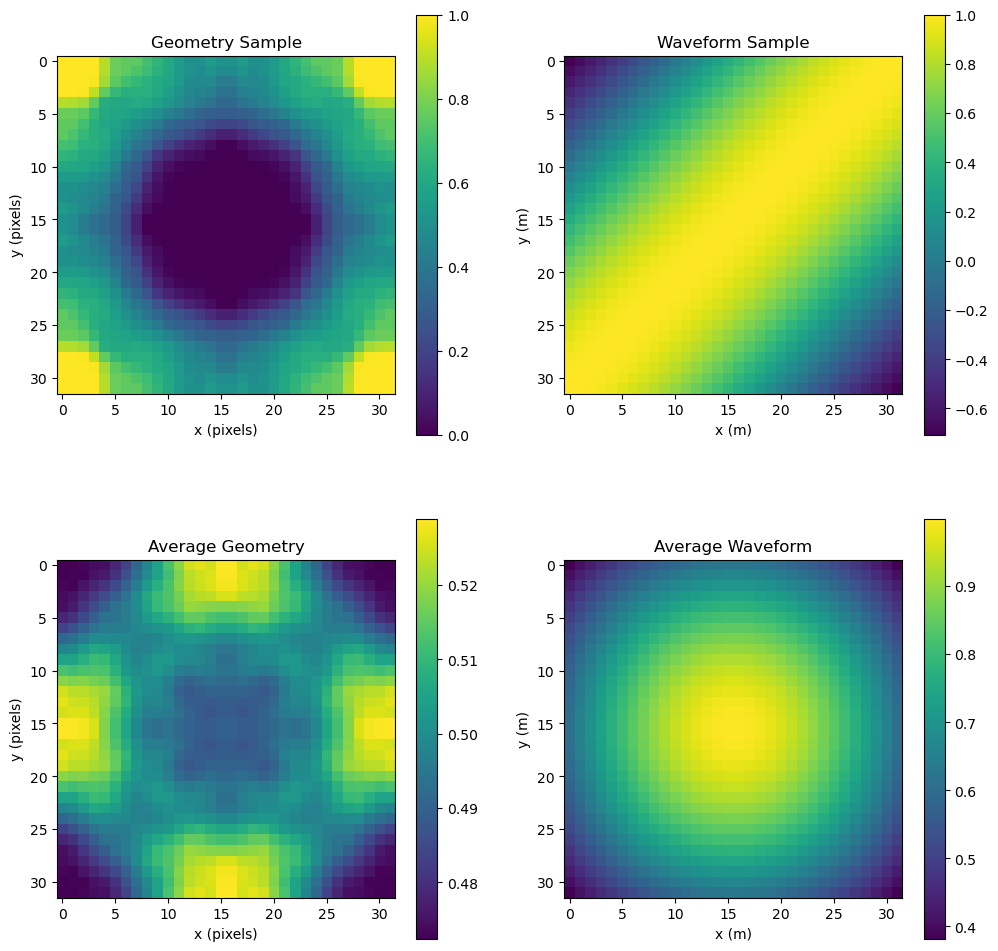

In [7]:
# Calculate the average values for geometry and waveform across all samples
print(f'designs shape: {designs.shape}')
print(f'WAVEFORM_DATA shape: {WAVEFORM_DATA.shape}')

avg_geometry = np.mean(designs[:, 0], axis=0)
avg_waveform = np.mean(WAVEFORM_DATA[0,:], axis=0)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the geometry sample on the top-left
im1 = axes[0, 0].imshow(sample_geometry, cmap='viridis')
axes[0, 0].set_title('Geometry Sample')
axes[0, 0].set_xlabel('x (pixels)')
axes[0, 0].set_ylabel('y (pixels)')
plt.colorbar(im1, ax=axes[0, 0])

# Plot the waveform sample on the top-right
im2 = axes[0, 1].imshow(sample_waveform, cmap='viridis')
axes[0, 1].set_title('Waveform Sample')
axes[0, 1].set_xlabel('x (m)')
axes[0, 1].set_ylabel('y (m)')
plt.colorbar(im2, ax=axes[0, 1])

# Plot the average geometry on the bottom-left
im3 = axes[1, 0].imshow(avg_geometry, cmap='viridis')
axes[1, 0].set_title('Average Geometry')
axes[1, 0].set_xlabel('x (pixels)')
axes[1, 0].set_ylabel('y (pixels)')
plt.colorbar(im3, ax=axes[1, 0])

# Plot the average waveform on the bottom-right
im4 = axes[1, 1].imshow(avg_waveform, cmap='viridis')
axes[1, 1].set_title('Average Waveform')
axes[1, 1].set_xlabel('x (m)')
axes[1, 1].set_ylabel('y (m)')
plt.colorbar(im4, ax=axes[1, 1])

print(f'Average pixel values of all geometries: {np.mean(designs[:,0])}')
print(f'Average pixel values of all waveforms: {np.mean(WAVEFORM_DATA[0,:])}')

Design: 49, Band: 2, Wavevector: 282


C:\Users\hz283\Documents\Duke\Research\NO-2D-Metamaterials\NO_utils.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


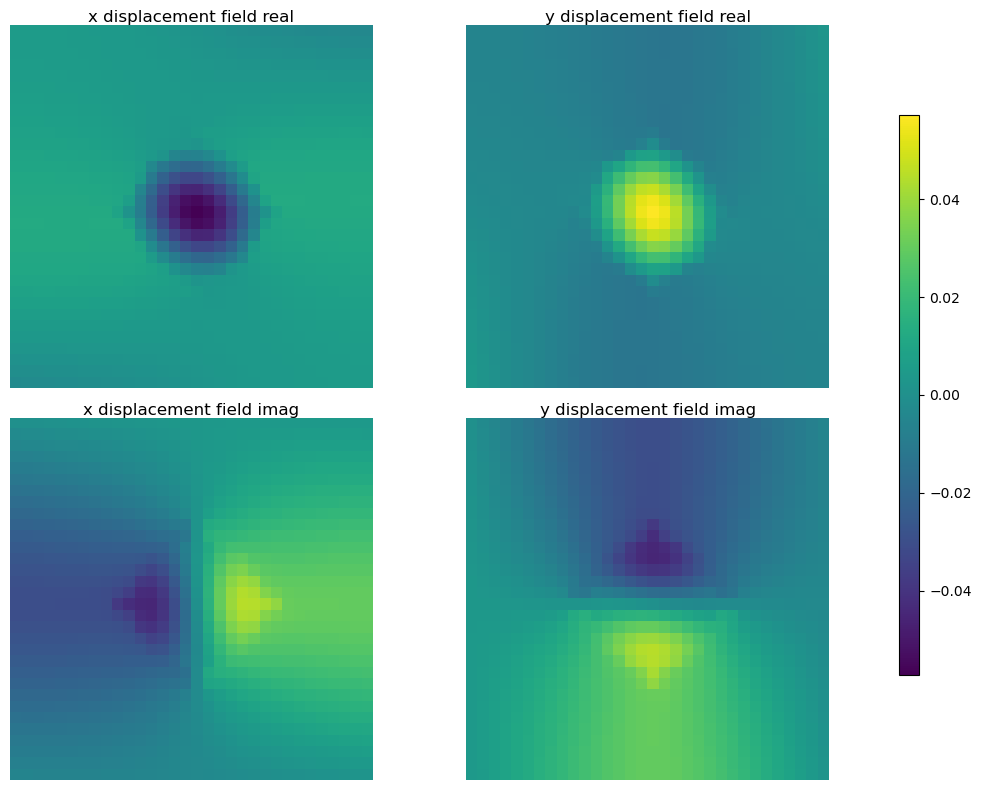

In [8]:
# View eigenvectors for the selected design, band, and wavevector
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_wavevector}')
sample_eigenvector_x = EIGENVECTOR_DATA_x[sample_index, sample_wavevector, sample_band]
sample_eigenvector_y = EIGENVECTOR_DATA_y[sample_index, sample_wavevector, sample_band]

NO_utils.plot_eigenvectors(sample_eigenvector_x, sample_eigenvector_y, unify_scales=True)

## Model architecture & training

In [9]:
# Import modules for building a neural operator model
import numpy as np
import scipy as sp
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR

# Import specialized neural operator model tools
from neuralop.models import FNO, FNO2d, TFNO, TFNO2d
from neuralop import Trainer
from neuralop.training import CheckpointCallback
from neuralop.datasets import load_darcy_flow_small
from neuralop.utils import count_model_params
from neuralop.datasets import data_transforms
from neuralop import LpLoss, H1Loss

# For creating datasets and data loaders for training and evaluation
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler

# Optional: torchvision for augmentations and transformations (if working with image-like data)
import torchvision.transforms as transforms

# For plotting and visualization
import matplotlib.pyplot as plt

# Optional: Use tqdm for progress bars during training and evaluation
from tqdm import tqdm

# Optional: If you are working with graph data or architectures
# import torch_geometric

# If you need automatic differentiation for custom operations or gradients
from torch.autograd import Function

In [10]:
#Set the device for the neural operator model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using Device:', device)
print("Using PyTorch version:", torch.__version__)

Using Device: cuda
Using PyTorch version: 2.4.1+cu118


In [11]:
# Print the shape of the first input tensor for confirmation
print("Shape of the first input tensor to be assigned:")
print("designs[0, 0]:", designs[0, 0].shape)
print("WAVEFORM_DATA[0, 0]:", WAVEFORM_DATA[0, 0].shape)

# Print the shape of the first output tensor for confirmation
print("Shape of the first output tensor to be assigned:")
print("EIGENVECTOR_DATA_x[0, 0, 0]:", EIGENVECTOR_DATA_x[0, 0, 0].shape)
print("EIGENVECTOR_DATA_x[0, 0, 0]:", EIGENVECTOR_DATA_y[0, 0, 0].shape)

Shape of the first input tensor to be assigned:
designs[0, 0]: (32, 32)
WAVEFORM_DATA[0, 0]: (32, 32)
Shape of the first output tensor to be assigned:
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)


In [12]:
def symlog_transform(x, linthresh=1):
    return np.sign(x) * np.log10(np.abs(x) + linthresh)

def symlog_inverse_transform(y, linthresh=1):
    return np.sign(y) * (10**np.abs(y) - linthresh)

# Function to fit and transform with StandardScaler, with optional symlog transformation
def standardize_array(array, symlog=False):
    scaler = StandardScaler()
    original_shape = array.shape
    array_flat = array.reshape(-1, 1)  # Flatten the array to 2D

    if symlog:
        array_flat = symlog_transform(array_flat)

    array_standardized = scaler.fit_transform(array_flat).reshape(original_shape)
    mean = scaler.mean_[0]
    scale = scaler.scale_[0]

    return array_standardized, mean, scale, symlog

In [13]:
# Standardizing EIGENVALUE_DATA and casting to float16
EIGENVALUE_DATA_standardized, eigenvalue_mean, eigenvalue_scale, _ = standardize_array(EIGENVALUE_DATA)
EIGENVALUE_DATA_standardized = EIGENVALUE_DATA_standardized.astype(np.float16)

# Standardizing EIGENVECTOR_DATA_x (real and imaginary parts separately) and casting to float16
EIGENVECTOR_x_r = EIGENVECTOR_DATA_x.real.astype(np.float16)
EIGENVECTOR_x_i = EIGENVECTOR_DATA_x.imag.astype(np.float16)

EIGENVECTOR_x_r_standardized, eigvector_x_r_mean, eigvector_x_r_scale, _ = standardize_array(EIGENVECTOR_x_r)
EIGENVECTOR_x_r_standardized = EIGENVECTOR_x_r_standardized.astype(np.float16)

EIGENVECTOR_x_i_standardized, eigvector_x_i_mean, eigvector_x_i_scale, _ = standardize_array(EIGENVECTOR_x_i)
EIGENVECTOR_x_i_standardized = EIGENVECTOR_x_i_standardized.astype(np.float16)

# Standardizing EIGENVECTOR_DATA_y (real and imaginary parts separately) and casting to float16
EIGENVECTOR_y_r = EIGENVECTOR_DATA_y.real.astype(np.float16)
EIGENVECTOR_y_i = EIGENVECTOR_DATA_y.imag.astype(np.float16)

EIGENVECTOR_y_r_standardized, eigvector_y_r_mean, eigvector_y_r_scale, _ = standardize_array(EIGENVECTOR_y_r)
EIGENVECTOR_y_r_standardized = EIGENVECTOR_y_r_standardized.astype(np.float16)

EIGENVECTOR_y_i_standardized, eigvector_y_i_mean, eigvector_y_i_scale, _ = standardize_array(EIGENVECTOR_y_i)
EIGENVECTOR_y_i_standardized = EIGENVECTOR_y_i_standardized.astype(np.float16)

# Standardizing WAVEVECTOR_DATA and casting to float16
WAVEVECTOR_DATA_standardized, wavevector_mean, wavevector_scale, _ = standardize_array(WAVEVECTOR_DATA)
WAVEVECTOR_DATA_standardized = WAVEVECTOR_DATA_standardized.astype(np.float16)

del EIGENVECTOR_DATA_x, EIGENVECTOR_DATA_y


In [14]:
# Print shapes and data types of arrays to verify
print("EIGENVALUE_DATA_standardized shape:", EIGENVALUE_DATA_standardized.shape, "dtype:", EIGENVALUE_DATA_standardized.dtype)
print("EIGENVECTOR_x_r_standardized shape:", EIGENVECTOR_x_r_standardized.shape, "dtype:", EIGENVECTOR_x_r_standardized.dtype)
print("EIGENVECTOR_x_i_standardized shape:", EIGENVECTOR_x_i_standardized.shape, "dtype:", EIGENVECTOR_x_i_standardized.dtype)
print("EIGENVECTOR_y_r_standardized shape:", EIGENVECTOR_y_r_standardized.shape, "dtype:", EIGENVECTOR_y_r_standardized.dtype)
print("EIGENVECTOR_y_i_standardized shape:", EIGENVECTOR_y_i_standardized.shape, "dtype:", EIGENVECTOR_y_i_standardized.dtype)
print("WAVEVECTOR_DATA_standardized shape:", WAVEVECTOR_DATA_standardized.shape, "dtype:", WAVEVECTOR_DATA_standardized.dtype)
print('\n')

# Print the mean and scale values for each standardized array
print("Eigenvalue mean, scale:", eigenvalue_mean, eigenvalue_scale)
print("Eigenvector x real mean, scale:", eigvector_x_r_mean, eigvector_x_r_scale)
print("Eigenvector x imag mean, scale:", eigvector_x_i_mean, eigvector_x_i_scale)
print("Eigenvector y real mean, scale:", eigvector_y_r_mean, eigvector_y_r_scale)
print("Eigenvector y imag mean, scale:", eigvector_y_i_mean, eigvector_y_i_scale)
print("Wavevector mean, scale:", wavevector_mean, wavevector_scale)
print('\n')

# Print the full range and data types of values for each standardized array
print("Eigenvalue range:", np.min(EIGENVALUE_DATA_standardized), np.max(EIGENVALUE_DATA_standardized), "dtype:", EIGENVALUE_DATA_standardized.dtype)
print("Eigenvector x real range:", np.min(EIGENVECTOR_x_r_standardized), np.max(EIGENVECTOR_x_r_standardized), "dtype:", EIGENVECTOR_x_r_standardized.dtype)
print("Eigenvector x imag range:", np.min(EIGENVECTOR_x_i_standardized), np.max(EIGENVECTOR_x_i_standardized), "dtype:", EIGENVECTOR_x_i_standardized.dtype)
print("Eigenvector y real range:", np.min(EIGENVECTOR_y_r_standardized), np.max(EIGENVECTOR_y_r_standardized), "dtype:", EIGENVECTOR_y_r_standardized.dtype)
print("Eigenvector y imag range:", np.min(EIGENVECTOR_y_i_standardized), np.max(EIGENVECTOR_y_i_standardized), "dtype:", EIGENVECTOR_y_i_standardized.dtype)
print("Wavevector range:", np.min(WAVEVECTOR_DATA_standardized), np.max(WAVEVECTOR_DATA_standardized), "dtype:", WAVEVECTOR_DATA_standardized.dtype)

EIGENVALUE_DATA_standardized shape: (600, 325, 6) dtype: float16
EIGENVECTOR_x_r_standardized shape: (600, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_x_i_standardized shape: (600, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_y_r_standardized shape: (600, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_y_i_standardized shape: (600, 325, 6, 32, 32) dtype: float16
WAVEVECTOR_DATA_standardized shape: (600, 325, 2) dtype: float16


Eigenvalue mean, scale: 1878.1603291255526 800.2777320234528
Eigenvector x real mean, scale: 0.0018456854386973039 0.016225094988913835
Eigenvector x imag mean, scale: -0.0008928369140793255 0.014881332736059778
Eigenvector y real mean, scale: -0.0006861322846175589 0.015982821838965548
Eigenvector y imag mean, scale: -0.0008507395951686781 0.015198877292350333
Wavevector mean, scale: 0.7851938100961539 1.6961967499598463


Eigenvalue range: -2.348 2.797 dtype: float16
Eigenvector x real range: -42.38 36.5 dtype: float16
Eigenvector x imag range: -39.03 39.1 dtype: floa

In [15]:
# # Standardizing EIGENVALUE_DATA and casting to float16
# EIGENVALUE_DATA_log_standardized, eigenvalue_log_mean, eigenvalue_log_scale, _ = standardize_array(EIGENVALUE_DATA, symlog=True)
# EIGENVALUE_DATA_log_standardized = EIGENVALUE_DATA_log_standardized.astype(np.float16)
# 
# # Standardizing EIGENVECTOR_DATA_x (real and imaginary parts separately) and casting to float16
# EIGENVECTOR_x_r_log_standardized, eigvector_x_r_log_mean, eigvector_x_r_log_scale, _ = standardize_array(EIGENVECTOR_x_r, symlog=True)
# EIGENVECTOR_x_r_log_standardized = EIGENVECTOR_x_r_log_standardized.astype(np.float16)
# 
# EIGENVECTOR_x_i_log_standardized, eigvector_x_i_log_mean, eigvector_x_i_log_scale, _ = standardize_array(EIGENVECTOR_x_i, symlog=True)
# EIGENVECTOR_x_i_log_standardized = EIGENVECTOR_x_i_log_standardized.astype(np.float16)
# 
# # Standardizing EIGENVECTOR_DATA_y (real and imaginary parts separately) and casting to float16
# EIGENVECTOR_y_r_log_standardized, eigvector_y_r_log_mean, eigvector_y_r_log_scale, _ = standardize_array(EIGENVECTOR_y_r, symlog=True)
# EIGENVECTOR_y_r_log_standardized = EIGENVECTOR_y_r_log_standardized.astype(np.float16)
# 
# EIGENVECTOR_y_i_log_standardized, eigvector_y_i_log_mean, eigvector_y_i_log_scale, _ = standardize_array(EIGENVECTOR_y_i, symlog=True)
# EIGENVECTOR_y_i_log_standardized = EIGENVECTOR_y_i_log_standardized.astype(np.float16)
# 
# # Standardizing WAVEVECTOR_DATA and casting to float16
# WAVEVECTOR_DATA_log_standardized, wavevector_log_mean, wavevector_log_scale, _ = standardize_array(WAVEVECTOR_DATA, symlog=True)
# WAVEVECTOR_DATA_log_standardized = WAVEVECTOR_DATA_log_standardized.astype(np.float16)


In [16]:
# # Print shapes and data types of symlog arrays to verify
# print("EIGENVALUE_DATA_log_standardized shape:", EIGENVALUE_DATA_log_standardized.shape, "dtype:", EIGENVALUE_DATA_log_standardized.dtype)
# print("EIGENVECTOR_x_r_log_standardized shape:", EIGENVECTOR_x_r_log_standardized.shape, "dtype:", EIGENVECTOR_x_r_log_standardized.dtype)
# print("EIGENVECTOR_x_i_log_standardized shape:", EIGENVECTOR_x_i_log_standardized.shape, "dtype:", EIGENVECTOR_x_i_log_standardized.dtype)
# print("EIGENVECTOR_y_r_log_standardized shape:", EIGENVECTOR_y_r_log_standardized.shape, "dtype:", EIGENVECTOR_y_r_log_standardized.dtype)
# print("EIGENVECTOR_y_i_log_standardized shape:", EIGENVECTOR_y_i_log_standardized.shape, "dtype:", EIGENVECTOR_y_i_log_standardized.dtype)
# print("WAVEVECTOR_DATA_log_standardized shape:", WAVEVECTOR_DATA_log_standardized.shape, "dtype:", WAVEVECTOR_DATA_log_standardized.dtype)
# print('\n')
# 
# # Print the mean and scale values for each standardized symlog array
# print("Eigenvalue mean, scale:", eigenvalue_log_mean, eigenvalue_log_scale)
# print("Eigenvector x real mean, scale:", eigvector_x_r_log_mean, eigvector_x_r_log_scale)
# print("Eigenvector x imag mean, scale:", eigvector_x_i_log_mean, eigvector_x_i_log_scale)
# print("Eigenvector y real mean, scale:", eigvector_y_r_log_mean, eigvector_y_r_log_scale)
# print("Eigenvector y imag mean, scale:", eigvector_y_i_log_mean, eigvector_y_i_log_scale)
# print("Wavevector mean, scale:", wavevector_log_mean, wavevector_log_scale)
# print('\n')
# 
# # Print the full range and data type of values for each standardized symlog array
# print("Eigenvalue range:", np.min(EIGENVALUE_DATA_log_standardized), np.max(EIGENVALUE_DATA_log_standardized), "dtype:", EIGENVALUE_DATA_log_standardized.dtype)
# print("Eigenvector x real range:", np.min(EIGENVECTOR_x_r_log_standardized), np.max(EIGENVECTOR_x_r_log_standardized), "dtype:", EIGENVECTOR_x_r_log_standardized.dtype)
# print("Eigenvector x imag range:", np.min(EIGENVECTOR_x_i_log_standardized), np.max(EIGENVECTOR_x_i_log_standardized), "dtype:", EIGENVECTOR_x_i_log_standardized.dtype)
# print("Eigenvector y real range:", np.min(EIGENVECTOR_y_r_log_standardized), np.max(EIGENVECTOR_y_r_log_standardized), "dtype:", EIGENVECTOR_y_r_log_standardized.dtype)
# print("Eigenvector y imag range:", np.min(EIGENVECTOR_y_i_log_standardized), np.max(EIGENVECTOR_y_i_log_standardized), "dtype:", EIGENVECTOR_y_i_log_standardized.dtype)
# print("Wavevector range:", np.min(WAVEVECTOR_DATA_log_standardized), np.max(WAVEVECTOR_DATA_log_standardized), "dtype:", WAVEVECTOR_DATA_log_standardized.dtype)


In [17]:
# Delete unused tensors to free up RAM
del EIGENVECTOR_DATA_x_flat, EIGENVECTOR_DATA_y_flat
del EIGENVECTOR_x_r, EIGENVECTOR_x_i, EIGENVECTOR_y_r, EIGENVECTOR_y_i

In [18]:
# Prepare input and output data
num_samples = n_designs * n_wavevectors * n_bands
input_data = torch.zeros((num_samples, 3, design_res, design_res))
output_data = torch.zeros((num_samples, 4, design_res, design_res))

sample_idx = 0
for i in range(n_designs):
    for j in range(n_wavevectors):
        for k in range(n_bands):

            input_data[sample_idx, 0] = torch.from_numpy(designs[i, 0])
            input_data[sample_idx, 1] = torch.from_numpy(waveforms[j])
            input_data[sample_idx, 2] = torch.from_numpy(bands_fft[k])

            output_data[sample_idx, 0] = torch.from_numpy(EIGENVECTOR_x_r_standardized[i, j, k])
            output_data[sample_idx, 1] = torch.from_numpy(EIGENVECTOR_x_i_standardized[i, j, k])
            output_data[sample_idx, 2] = torch.from_numpy(EIGENVECTOR_y_r_standardized[i, j, k])
            output_data[sample_idx, 3] = torch.from_numpy(EIGENVECTOR_y_i_standardized[i, j, k])

            sample_idx += 1

# Create dataset
dataset = TensorDataset(input_data, output_data)

# Split dataset into train, test, and validation sets
train_size = int(0.75 * len(dataset))
test_size = int(0.2 * len(dataset))
val_size = len(dataset) - train_size - test_size

# train_dataset, test_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, test_size, val_size])

train_dataset, test_dataset, val_dataset = random_split(dataset, [train_size, test_size, val_size])

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Train dataset size: 877500
Test dataset size: 234000
Validation dataset size: 58500


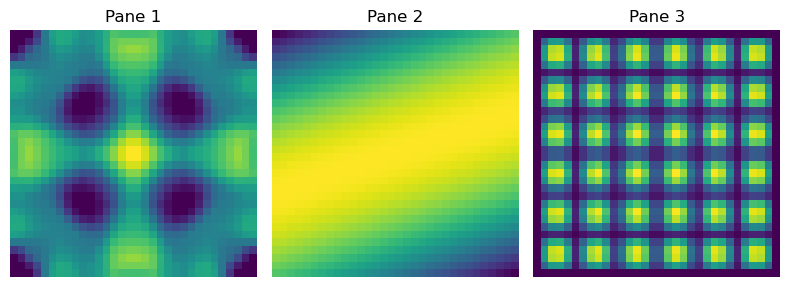

In [19]:
# Visualize a random sample input from the dataset
random_idx = np.random.randint(0, len(dataset))
random_input, random_output = dataset[random_idx]
input_shape = random_input.shape

fig, axes = plt.subplots(1, input_shape[0], figsize=(8, 8))
axes = axes.flatten()

for i in range(3):
    if i == 0:
        img = random_input[i].numpy()
    else:
        img = random_input[i].abs().numpy()
    axes[i].imshow(img, cmap='viridis')
    axes[i].set_title(f'Pane {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

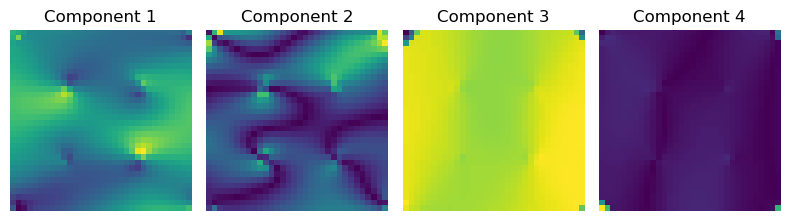

In [20]:
# Visualize a random sample output from the dataset
output_shape = random_output.shape

fig, axes = plt.subplots(1, output_shape[0], figsize=(8, 8))
axes = axes.flatten()

for i in range(4):
    if i % 2 == 0:
        img = random_output[i].numpy()
    else:
        img = random_output[i].abs().numpy()
    axes[i].imshow(img, cmap='viridis')
    axes[i].set_title(f'Component {i+1}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [21]:
# Print the shapes of the input and output data, train, test, and validation sets
print('Input data shape:', input_data.shape)
print('Output data shape:', output_data.shape)
print('Train data size:', len(train_dataset))
print('Test data size:', len(test_dataset))
print('Validation data size:', len(val_dataset))

# Inspect the first batch of data
for sample in train_loader:
    print('Batch shape:', sample[0].shape, sample[1].shape)
    #print(sample)
    break

Input data shape: torch.Size([1170000, 3, 32, 32])
Output data shape: torch.Size([1170000, 4, 32, 32])
Train data size: 877500
Test data size: 234000
Validation data size: 58500
Batch shape: torch.Size([256, 3, 32, 32]) torch.Size([256, 4, 32, 32])


In [80]:
class FourierNeuralOperator(nn.Module):
    def __init__(self, modes_height, modes_width, in_channels=3, out_channels=4, hidden=32, num_layers=4):
        super(FourierNeuralOperator, self).__init__()
        self.modes_height = modes_height  # Number of Fourier modes in height dimension
        self.modes_width = modes_width  # Number of Fourier modes in width dimension
        self.hidden = hidden  # Width of the hidden channels
        self.in_channels = in_channels  # Number of input channels
        self.out_channels = out_channels  # Number of output channels
        self.num_layers = num_layers

        # FNO2d layer
        self.fno = FNO2d(in_channels=self.in_channels, out_channels=self.out_channels, n_modes_height=self.modes_height, n_modes_width=self.modes_width, hidden_channels=self.hidden, num_layers=self.num_layers)

    def forward(self, x):
        # Apply the FNO2d layer
        x = self.fno(x)
        return x

In [81]:
def train_one_epoch(model, loader, criterion, optimizer, device, epoch, report_freq=100, save_after_batch=False, save_path=None):
    model.train()
    running_loss = 0.0
    total_batches = len(loader)
    progress_bar = tqdm(enumerate(loader), total=total_batches, desc=f"Epoch {epoch + 1}")

    for batch_idx, (inputs, targets) in progress_bar:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

        # Print progress for each batch
        if (batch_idx + 1) % report_freq == 0 or (batch_idx + 1) == total_batches:
            progress_bar.set_postfix(batch_loss=loss.item())

        # Save model weights after each batch if the flag is set
        if save_after_batch and save_path:
            save_model(model, save_path)

    epoch_loss = running_loss / len(loader.dataset)

    # Save model weights after each epoch if the flag is not set
    if not save_after_batch and save_path:
        save_model(model, save_path)

    return epoch_loss

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in tqdm(loader, desc="Evaluating"):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
            running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss

# Function to save the model weights
def save_model(model, file_path):
    torch.save(model.state_dict(), file_path)

# Function to load the model weights
def load_model(model, file_path):
    model.load_state_dict(torch.load(file_path))

In [117]:
import os
import matplotlib.pyplot as plt
import numpy as np

def plot_sample(data, title, labels, shared_colorbar=False, vmin=None, vmax=None, layout=None, save=False, save_path='plot.png'):
    # Automatically select layout based on the number of data arrays if not provided
    num_arrays = data.shape[0]
    if layout is None:
        if num_arrays == 3:
            layout = (1, 3)
        elif num_arrays == 4:
            layout = (2, 2)
        else:
            raise ValueError("Data input must have 3 or 4 arrays for plotting.")

    # Adjust figure size based on layout
    if layout == (1, 3):
        fig, axes = plt.subplots(*layout, figsize=(12, 4))  # Wide and short for 1x3 layout
    elif layout == (2, 2):
        fig, axes = plt.subplots(*layout, figsize=(8, 8))   # Square for 2x2 layout
    else:
        raise ValueError("Unsupported layout")

    for ax, (idx, label) in zip(axes.flatten(), labels):
        im = ax.imshow(data[idx, :, :].cpu(), cmap='viridis', vmin=vmin if shared_colorbar else None, vmax=vmax if shared_colorbar else None)
        ax.set_title(label)
        if not shared_colorbar:
            fig.colorbar(im, ax=ax)

    if shared_colorbar:
        # Add a single colorbar to the right of the plot
        cbar = fig.colorbar(im, ax=axes.ravel().tolist())
        cbar.ax.set_ylabel('Color scale')

    plt.suptitle(title)

    if save:
        # Save the figure
        plt.savefig(save_path)
        print(f"Plot saved at {save_path}")
        plt.close(fig)
    else:
        # Display the figure
        plt.show()

def plot_inputs(data, title, labels, save=False, save_path='example_plot.png'):
    # Plot inputs with layout (1, 3) and custom figure size
    plot_sample(data, title, labels, shared_colorbar=True, layout=(1, 3), save=save, save_path=save_path)

def plot_predictions_and_targets(inputs, outputs, targets, save=False, save_dir='figures/', file_suffix='example'):
    # Ensure save directory exists if save is True
    if save:
        os.makedirs(save_dir, exist_ok=True)

    # Add file_suffix to the filenames
    input_filename = f'{save_dir}/input_{file_suffix}.png'
    output_filename = f'{save_dir}/output_{file_suffix}.png'
    target_filename = f'{save_dir}/target_{file_suffix}.png'

    input_labels = [(0, 'geometry'), (1, 'waveform'), (2, 'band')]
    plot_inputs(inputs, 'Inputs', input_labels, save=save, save_path=input_filename)

    # Compute global min and max for shared colorbar between outputs and targets
    vmin = min(np.min(outputs.cpu().numpy()), np.min(targets.cpu().numpy()))
    vmax = max(np.max(outputs.cpu().numpy()), np.max(targets.cpu().numpy()))

    prediction_labels = [(0, 'eigenvector_x_real'), (1, 'eigenvector_x_imag'), (2, 'eigenvector_y_real'), (3, 'eigenvector_y_imag')]
    plot_sample(outputs, "Model Predictions", prediction_labels, shared_colorbar=True, vmin=vmin, vmax=vmax, save=save, save_path=output_filename)

    target_labels = [(0, 'eigenvector_x_real'), (1, 'eigenvector_x_imag'), (2, 'eigenvector_y_real'), (3, 'eigenvector_y_imag')]
    plot_sample(targets, "Target Values", target_labels, shared_colorbar=True, vmin=vmin, vmax=vmax, save=save, save_path=target_filename)



In [83]:
hc = 128; lr = 1e-2; wd = 1e-2; ss = 10; gamma = 0.1

model = FourierNeuralOperator(modes_height=design_res, modes_width=design_res, in_channels=3, out_channels=4, hidden=hc).to(device)

# Define the loss function
criterion = nn.MSELoss()  # Mean Squared Error loss

# Define the optimizer
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)

# Define the learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=ss, gamma=gamma)

In [84]:
# Parameters for saving/loading model weights
save_path = f'./model_weights_hc{hc}_lr{lr:.0e}_wd{wd:.0e}_ss{ss}_gamma{gamma:.0e}.pth'
print(save_path)
load_existing_model = False  # Set to True if you want to load an existing model

# Load the model weights if a valid file path is provided and the flag is set
if load_existing_model and os.path.isfile(save_path):
    load_model(model, save_path)
    print(f"Loaded model weights from {save_path}")

# Lists to store losses for plotting
train_losses = []
val_losses = []

./model_weights_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.pth


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.25it/s]


Epoch 1/100, Training Loss: 0.2675, Validation Loss: 0.28422557


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.53it/s]


Epoch 2/100, Training Loss: 0.2667, Validation Loss: 0.28324504


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.57it/s]


Epoch 3/100, Training Loss: 0.2659, Validation Loss: 0.28048553


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.53it/s]


Epoch 4/100, Training Loss: 0.2647, Validation Loss: 0.28242423


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.40it/s]


Epoch 5/100, Training Loss: 0.2641, Validation Loss: 0.28341297


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.56it/s]


Epoch 6/100, Training Loss: 0.2635, Validation Loss: 0.28274777


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.69it/s]


Epoch 7/100, Training Loss: 0.2628, Validation Loss: 0.28271995


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.59it/s]


Epoch 8/100, Training Loss: 0.2628, Validation Loss: 0.28277844


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.73it/s]


Epoch 9/100, Training Loss: 0.2616, Validation Loss: 0.28230326


Evaluating: 100%|██████████| 229/229 [00:28<00:00,  8.14it/s]


Epoch 10/100, Training Loss: 0.2612, Validation Loss: 0.29333423


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.49it/s]


Epoch 11/100, Training Loss: 0.2606, Validation Loss: 0.28086611


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.47it/s]


Epoch 12/100, Training Loss: 0.2599, Validation Loss: 0.28260796


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.48it/s]


Epoch 13/100, Training Loss: 0.2588, Validation Loss: 0.28881574


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.31it/s]


Epoch 14/100, Training Loss: 0.2583, Validation Loss: 0.27947525


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.65it/s]


Epoch 15/100, Training Loss: 0.2584, Validation Loss: 0.27455938


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.59it/s]


Epoch 16/100, Training Loss: 0.2575, Validation Loss: 0.28599061


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.33it/s]


Epoch 17/100, Training Loss: 0.2567, Validation Loss: 0.27908347


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.43it/s]


Epoch 18/100, Training Loss: 0.2565, Validation Loss: 0.28119584


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.52it/s]


Epoch 19/100, Training Loss: 0.2559, Validation Loss: 0.28305531


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.47it/s]


Epoch 20/100, Training Loss: 0.2558, Validation Loss: 0.28966231


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.39it/s]


Epoch 21/100, Training Loss: 0.2558, Validation Loss: 0.28586591


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.64it/s]


Epoch 22/100, Training Loss: 0.2544, Validation Loss: 0.28843819


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.54it/s]


Epoch 23/100, Training Loss: 0.2545, Validation Loss: 0.28080537


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.60it/s]


Epoch 24/100, Training Loss: 0.2543, Validation Loss: 0.28248397


Evaluating: 100%|██████████| 229/229 [00:32<00:00,  7.10it/s]


Epoch 25/100, Training Loss: 0.2538, Validation Loss: 0.27713756


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.73it/s]


Epoch 26/100, Training Loss: 0.2531, Validation Loss: 0.27646585


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.47it/s]


Epoch 27/100, Training Loss: 0.2525, Validation Loss: 0.28710846


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.56it/s]


Epoch 28/100, Training Loss: 0.2525, Validation Loss: 0.27863312


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.55it/s]


Epoch 29/100, Training Loss: 0.2530, Validation Loss: 0.27440488


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.47it/s]


Epoch 30/100, Training Loss: 0.2513, Validation Loss: 0.27697206


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.83it/s]


Epoch 31/100, Training Loss: 0.2511, Validation Loss: 0.28026460


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.39it/s]


Epoch 32/100, Training Loss: 0.2506, Validation Loss: 0.27634717


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.65it/s]


Epoch 33/100, Training Loss: 0.2501, Validation Loss: 0.27881606


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.39it/s]


Epoch 34/100, Training Loss: 0.2502, Validation Loss: 0.27669196


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.59it/s]


Epoch 35/100, Training Loss: 0.2497, Validation Loss: 0.27717190


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.28it/s]


Epoch 36/100, Training Loss: 0.2496, Validation Loss: 0.28016328


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.55it/s]


Epoch 37/100, Training Loss: 0.2493, Validation Loss: 0.28048317


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.52it/s]


Epoch 38/100, Training Loss: 0.2486, Validation Loss: 0.28083745


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.81it/s]


Epoch 39/100, Training Loss: 0.2485, Validation Loss: 0.27613002


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.42it/s]


Epoch 40/100, Training Loss: 0.2481, Validation Loss: 0.27388942


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.44it/s]


Epoch 41/100, Training Loss: 0.2480, Validation Loss: 0.27674059


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.27it/s]


Epoch 42/100, Training Loss: 0.2479, Validation Loss: 0.27461313


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.22it/s]


Epoch 43/100, Training Loss: 0.2479, Validation Loss: 0.28315510


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.54it/s]


Epoch 44/100, Training Loss: 0.2474, Validation Loss: 0.28164998


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.60it/s]


Epoch 45/100, Training Loss: 0.2466, Validation Loss: 0.27884027


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.48it/s]


Epoch 46/100, Training Loss: 0.2462, Validation Loss: 0.27840303


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.65it/s]


Epoch 47/100, Training Loss: 0.2466, Validation Loss: 0.28556600


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.30it/s]


Epoch 48/100, Training Loss: 0.2462, Validation Loss: 0.27629011


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.65it/s]


Epoch 49/100, Training Loss: 0.2459, Validation Loss: 0.26934940


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.33it/s]


Epoch 50/100, Training Loss: 0.2458, Validation Loss: 0.27327851


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.60it/s]


Epoch 51/100, Training Loss: 0.2453, Validation Loss: 0.27590272


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.64it/s]


Epoch 52/100, Training Loss: 0.2457, Validation Loss: 0.27652550


Evaluating: 100%|██████████| 229/229 [00:28<00:00,  8.03it/s]


Epoch 53/100, Training Loss: 0.2450, Validation Loss: 0.28747318


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.75it/s]


Epoch 54/100, Training Loss: 0.2447, Validation Loss: 0.27271898


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.47it/s]


Epoch 55/100, Training Loss: 0.2442, Validation Loss: 0.28108018


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.58it/s]


Epoch 56/100, Training Loss: 0.2444, Validation Loss: 0.27839589


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.40it/s]


Epoch 57/100, Training Loss: 0.2441, Validation Loss: 0.27300559


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.70it/s]


Epoch 58/100, Training Loss: 0.2440, Validation Loss: 0.27602323


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.60it/s]


Epoch 59/100, Training Loss: 0.2458, Validation Loss: 0.27868527


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.52it/s]


Epoch 60/100, Training Loss: 0.2429, Validation Loss: 0.27531256


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.34it/s]


Epoch 61/100, Training Loss: 0.2441, Validation Loss: 0.27298735


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.56it/s]


Epoch 62/100, Training Loss: 0.2433, Validation Loss: 0.27493319


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.74it/s]


Epoch 63/100, Training Loss: 0.2432, Validation Loss: 0.27199090


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.40it/s]


Epoch 64/100, Training Loss: 0.2434, Validation Loss: 0.27418901


Evaluating: 100%|██████████| 229/229 [00:33<00:00,  6.82it/s]


Epoch 65/100, Training Loss: 0.2420, Validation Loss: 0.27330353


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.54it/s]


Epoch 66/100, Training Loss: 0.2424, Validation Loss: 0.27230373


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.48it/s]


Epoch 67/100, Training Loss: 0.2422, Validation Loss: 0.27330096


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.36it/s]


Epoch 68/100, Training Loss: 0.2422, Validation Loss: 0.27270859


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.55it/s]


Epoch 69/100, Training Loss: 0.2418, Validation Loss: 0.27845705


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.48it/s]


Epoch 70/100, Training Loss: 0.2418, Validation Loss: 0.27139256


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.39it/s]


Epoch 71/100, Training Loss: 0.2417, Validation Loss: 0.27302701


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.68it/s]


Epoch 72/100, Training Loss: 0.2414, Validation Loss: 0.26898008


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.63it/s]


Epoch 73/100, Training Loss: 0.2414, Validation Loss: 0.27176463


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.65it/s]


Epoch 74/100, Training Loss: 0.2406, Validation Loss: 0.27133327


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.65it/s]


Epoch 75/100, Training Loss: 0.2411, Validation Loss: 0.27515215


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.49it/s]


Epoch 76/100, Training Loss: 0.2409, Validation Loss: 0.27100996


Evaluating: 100%|██████████| 229/229 [00:32<00:00,  7.14it/s]


Epoch 77/100, Training Loss: 0.2406, Validation Loss: 0.27324889


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.51it/s]


Epoch 78/100, Training Loss: 0.2408, Validation Loss: 0.27079757


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.56it/s]


Epoch 79/100, Training Loss: 0.2398, Validation Loss: 0.26956113


Evaluating: 100%|██████████| 229/229 [00:28<00:00,  8.04it/s]


Epoch 80/100, Training Loss: 0.2400, Validation Loss: 0.27605291


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.57it/s]


Epoch 81/100, Training Loss: 0.2396, Validation Loss: 0.27138569


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.70it/s]


Epoch 82/100, Training Loss: 0.2401, Validation Loss: 0.27067210


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.79it/s]


Epoch 83/100, Training Loss: 0.2401, Validation Loss: 0.27236541


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.63it/s]


Epoch 84/100, Training Loss: 0.2394, Validation Loss: 0.27469008


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.53it/s]


Epoch 85/100, Training Loss: 0.2393, Validation Loss: 0.27336014


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.67it/s]


Epoch 86/100, Training Loss: 0.2391, Validation Loss: 0.27328634


Evaluating: 100%|██████████| 229/229 [00:28<00:00,  7.97it/s]


Epoch 87/100, Training Loss: 0.2388, Validation Loss: 0.26933417


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.76it/s]


Epoch 88/100, Training Loss: 0.2434, Validation Loss: 0.26601799


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.36it/s]


Epoch 89/100, Training Loss: 0.2386, Validation Loss: 0.26606022


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.82it/s]


Epoch 90/100, Training Loss: 0.2391, Validation Loss: 0.26927284


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.60it/s]


Epoch 91/100, Training Loss: 0.2394, Validation Loss: 0.27042328


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.79it/s]


Epoch 92/100, Training Loss: 0.2391, Validation Loss: 0.27398992


Evaluating: 100%|██████████| 229/229 [00:32<00:00,  7.10it/s]


Epoch 93/100, Training Loss: 0.2384, Validation Loss: 0.27171489


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.76it/s]


Epoch 94/100, Training Loss: 0.2388, Validation Loss: 0.27530114


Evaluating: 100%|██████████| 229/229 [00:30<00:00,  7.61it/s]


Epoch 95/100, Training Loss: 0.2379, Validation Loss: 0.27001473


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.38it/s]


Epoch 96/100, Training Loss: 0.2383, Validation Loss: 0.26902939


Evaluating: 100%|██████████| 229/229 [00:31<00:00,  7.37it/s]


Epoch 97/100, Training Loss: 0.2379, Validation Loss: 0.27089239


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.74it/s]


Epoch 98/100, Training Loss: 0.2380, Validation Loss: 0.27244791


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.68it/s]


Epoch 99/100, Training Loss: 0.2379, Validation Loss: 0.26549519


Evaluating: 100%|██████████| 229/229 [00:29<00:00,  7.72it/s]


Epoch 100/100, Training Loss: 0.2373, Validation Loss: 0.27606725


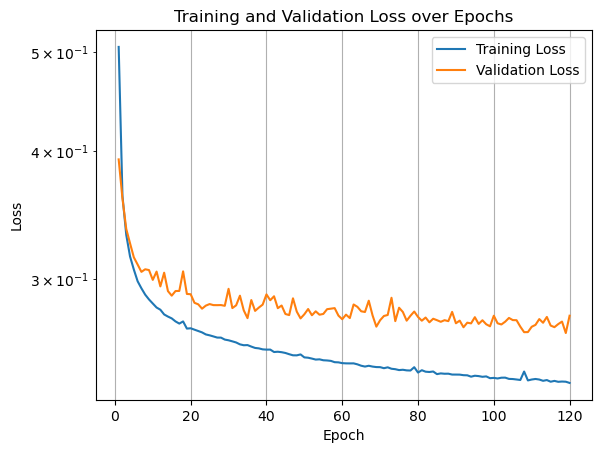

In [93]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device, epoch, report_freq=256, save_after_batch=False, save_path=save_path)
    
    val_loss = evaluate(model, val_loader, criterion, device)

    # Print progress for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.8f}")

    # Save losses for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Step the scheduler
    scheduler.step(val_loss)

timestamp = datetime.now().strftime('%y%m%d-%H%M%S')
# Plot the losses
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Set the y-axis to log scale
plt.savefig(f'loss_plot_{timestamp}.png')  # Save the plot as a PNG file
plt.show()  # Display the plot

In [94]:
# Save the model weights at the end of training
# save_model(model, save_path)
save_path_posttraining = f'{save_path[:-4]}_e{len(train_losses)}.pth'
save_model(model, save_path_posttraining)
print(f"Saved model weights to {save_path_posttraining}")

Saved model weights to ./model_weights_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01_e120.pth


In [95]:
# Load older model weights
# load_path = './model_weights_e101.pth'
# load_model(model, load_path)

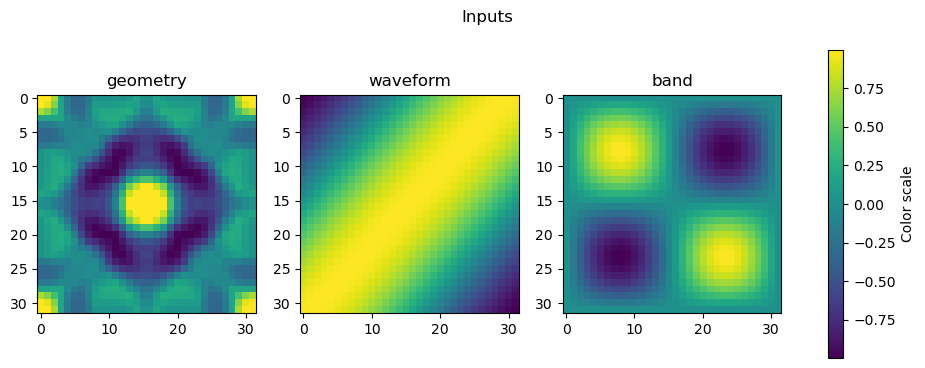

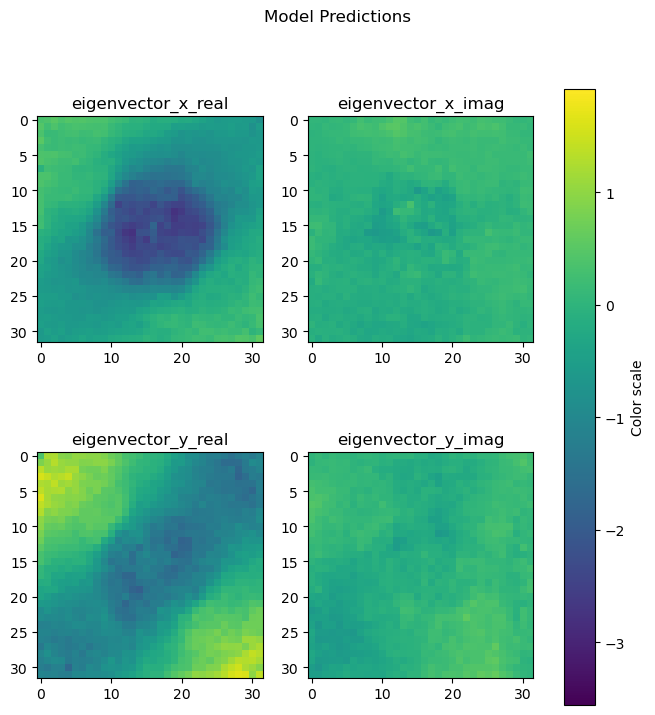

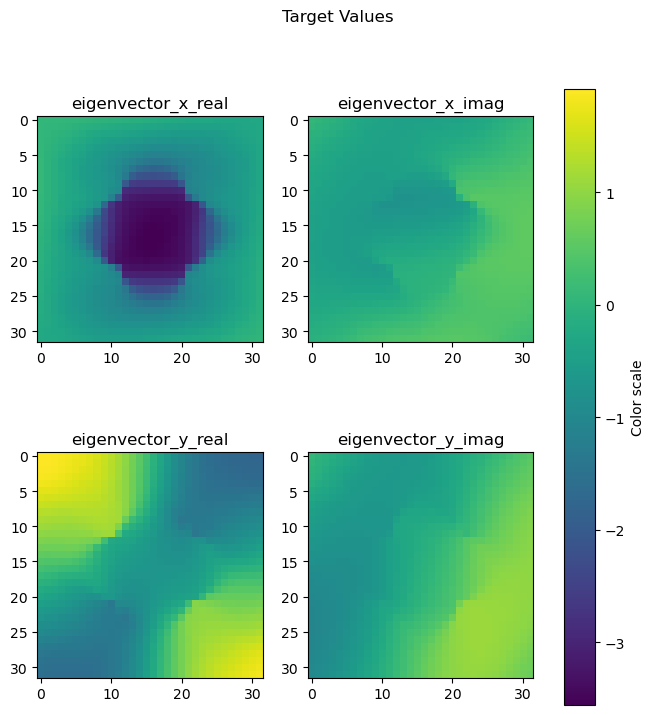

In [110]:
# Get a batch from the validation loader
inputs, targets = next(iter(val_loader))
inputs, targets = inputs.to(device), targets.to(device)

# Get a single sample from the batch
input_sample = inputs[1]
target_sample = targets[1]

# Run the model to get predictions
model.eval()
with torch.no_grad():
    output_sample = model(input_sample.unsqueeze(0)).squeeze(0)

# Plot the inputs, predictions, and targets
plot_predictions_and_targets(input_sample, output_sample, target_sample)


In [121]:
def save_sample_predictions(sample_num, interval, filename_suffix, file_path, model, val_loader, device, start_sample=0, plot_preview=False):
    # Ensure the directory exists, create if not
    os.makedirs(file_path, exist_ok=True)

    # Get a batch from the validation loader
    inputs, targets = next(iter(val_loader))
    inputs, targets = inputs.to(device), targets.to(device)

    # Loop through the samples based on sample_num
    for i in range(sample_num):
        # Calculate the current sample index based on start_sample and interval
        current_sample = start_sample + i * interval

        # Make sure the current sample index is within bounds
        if current_sample >= len(inputs):
            print(f"Sample index {current_sample} exceeds the number of available samples. Stopping loop.")
            break

        # Extract the current sample for inputs and targets
        input_sample = inputs[current_sample]
        target_sample = targets[current_sample]

        # Run the model to get predictions
        model.eval()
        with torch.no_grad():
            output_sample = model(input_sample.unsqueeze(0)).squeeze(0)

        # Generate the file suffix for this specific sample
        file_suffix = f'sample{i+1}_{filename_suffix}'

        # Plot and save the inputs, predictions, and targets using the new functionality
        plot_predictions_and_targets(
            input_sample,
            output_sample,
            target_sample,
            save=True,                   # Save the plots
            save_dir=file_path,           # Directory to save the plots
            file_suffix=file_suffix       # Suffix to make filenames unique
        )

        # Optionally preview the plots if plot_preview is True
        if plot_preview:
            plot_predictions_and_targets(
                input_sample,
                output_sample,
                target_sample,
                save=False                 # Only display the plots
            )

        print(f'Saved sample {i+1} with suffix {file_suffix} in {file_path}')


In [122]:
figure_folder = 'figures/hc128'
figure_suffix = f'hc{hc}_lr{lr:.0e}_wd{wd:.0e}_ss{ss}_gamma{gamma:.0e}'
save_sample_predictions(16, 8, figure_suffix, figure_folder, model, val_loader, device)


Plot saved at figures/hc128/input_sample1_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.png
Plot saved at figures/hc128/output_sample1_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.png
Plot saved at figures/hc128/target_sample1_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.png
Saved sample 1 with suffix sample1_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01 in figures/hc128
Plot saved at figures/hc128/input_sample2_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.png
Plot saved at figures/hc128/output_sample2_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.png
Plot saved at figures/hc128/target_sample2_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.png
Saved sample 2 with suffix sample2_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01 in figures/hc128
Plot saved at figures/hc128/input_sample3_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.png
Plot saved at figures/hc128/output_sample3_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.png
Plot saved at figures/hc128/target_sample3_hc128_lr1e-02_wd1e-02_ss10_gamma1e-01.png
Saved sample 3 with suffix sample3_hc128_lr1e-02_wd1e-02_s